<a href="https://colab.research.google.com/github/JonathanJuradoS/Clasificacion_2/blob/main/CASO_05_marketing_conversion_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caso: Marketing Conversion

## Descripción
Este caso simula un escenario realista relacionado con marketing conversion. Utiliza un dataset de 2000 registros con 10 características simuladas.

## Objetivo
Aplicar y comparar los modelos de clasificación: SVM, KNN, Árboles de Decisión y Boosting, para evaluar su desempeño en este contexto específico. Se utilizarán métricas como Accuracy, F1-Score y AUC-ROC.


### Paso 1: Importar librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, f1_score

### Paso 2: Cargar y explorar el dataset

In [3]:
df = pd.read_csv("/content/marketing_conversion.csv")
print("Primeros registros del dataset:")
print(df.head())

Primeros registros del dataset:
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   1.358834   1.888675  -0.230536   4.709586   1.484407  -3.321896   
1  -0.054274   3.442601  -0.236093   8.822617   1.350011  -1.509144   
2  -1.397995   1.112820   0.278335   0.495038  -1.422992  -1.071452   
3  -3.561585   1.606397  -0.106076   1.762384  -1.832212  -1.450571   
4  -0.624028  -1.278285  -0.350252   3.177622   1.879109   1.091784   

   feature_7  feature_8  feature_9  feature_10  target  
0   4.545722   3.097509  -2.653783    1.046015       1  
1   3.061975   4.840783   2.470225    0.767056       0  
2   3.211315   2.235686  -2.387614   -0.135808       0  
3   3.566216   2.437058  -1.760525    0.225059       0  
4   1.401382   1.153145   1.132018   -0.817978       0  


### Paso 3: Separar variables predictoras (X) y variable objetivo (y), y dividir en entrenamiento y prueba

In [4]:
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Paso 4: Normalizar las variables predictoras para evitar sesgo por escala

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Paso 5: Definir y entrenar los modelos de clasificación

In [6]:
models = {
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Boosting": GradientBoostingClassifier()
}

### Paso 6: Evaluar el desempeño de cada modelo

In [7]:
for model_name, model in models.items():
    print(f"\n\033[1mModelo: {model_name}\033[0m")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
        roc = roc_auc_score(y_test, y_prob)
        print(f"AUC-ROC: {roc:.2f}")
    print("F1-Score:", f1_score(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Reporte de Clasificación:")
    print(classification_report(y_test, y_pred))


Modelo: SVM
AUC-ROC: 0.99
F1-Score: 0.9780033840947546
Accuracy: 0.9783333333333334
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       307
           1       0.97      0.99      0.98       293

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600


Modelo: KNN
AUC-ROC: 0.98
F1-Score: 0.9763513513513513
Accuracy: 0.9766666666666667
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       307
           1       0.97      0.99      0.98       293

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600


Modelo: Decision Tree
AUC-ROC: 0.92
F1-Score: 0.9180887372013652
Accuracy: 0.92
Reporte de Clasificación:
              pre

### Paso 7: Visualizar la Matriz de Confusión para cada modelo

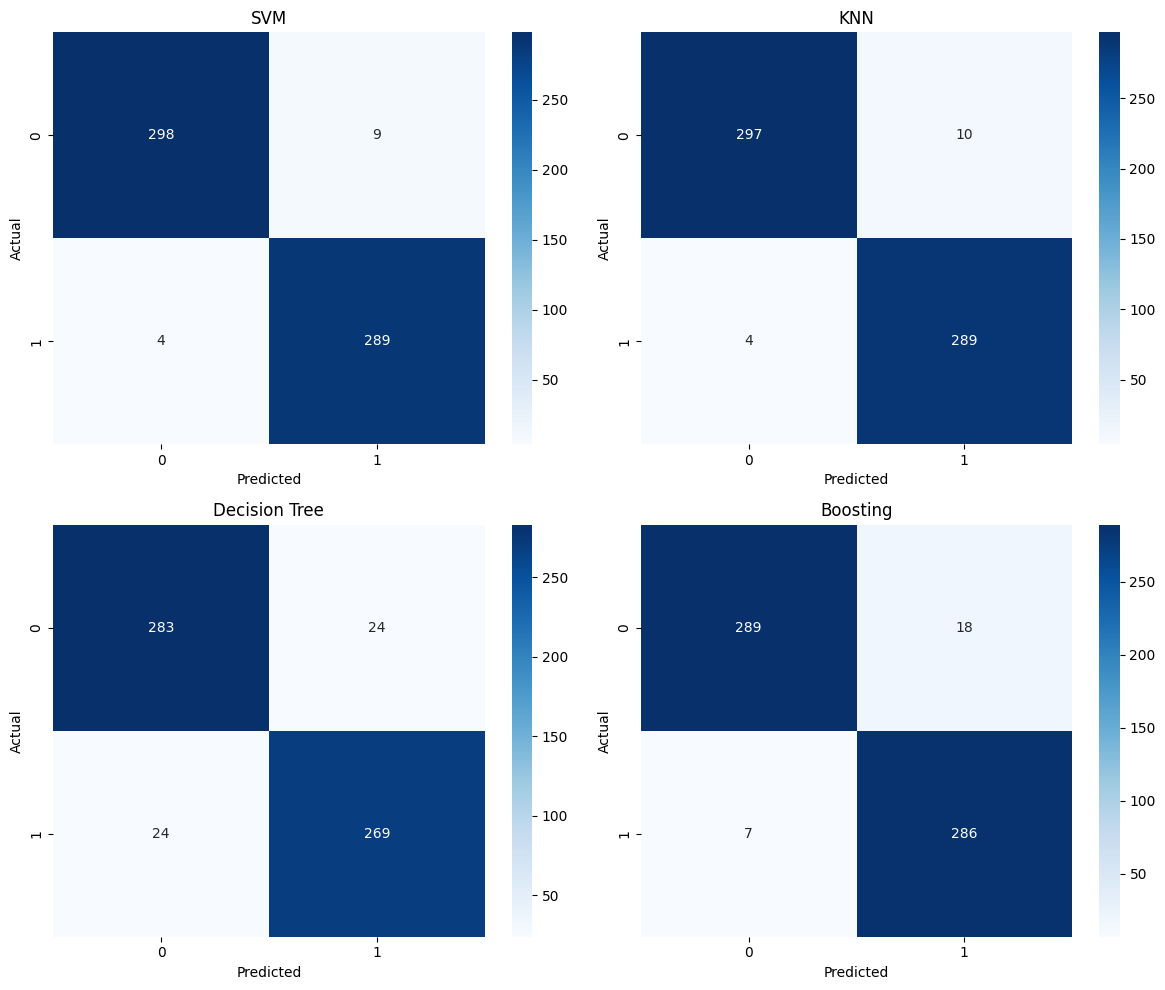

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))
for ax, (model_name, model) in zip(axes.ravel(), models.items()):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap="Blues")
    ax.set_title(f"{model_name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
plt.tight_layout()
plt.show()

### Paso 8: Graficar la curva ROC para comparar capacidad discriminativa

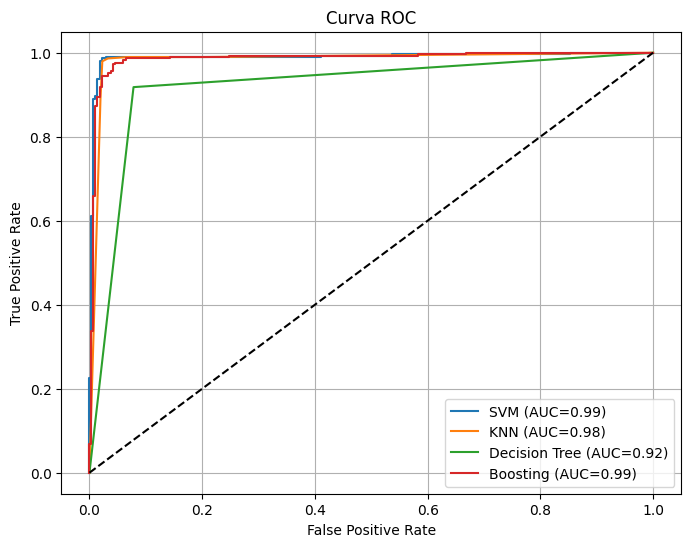

In [9]:
plt.figure(figsize=(8,6))
for model_name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test_scaled)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{model_name} (AUC={auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend()
plt.grid()
plt.show()

## Conclusiones del Caso: Marketing Conversion
- **SVM** demostró buena precisión y generalización con fronteras complejas.
- **KNN** fue fácil de implementar, pero sensible a la escala y al valor de K.
- **Árboles de Decisión** fueron interpretables pero propensos al sobreajuste.
- **Boosting (Gradient Boosting)** mostró mejor desempeño general a costa de más tiempo de entrenamiento.

Se recomienda seleccionar el modelo en función del objetivo del negocio y del balance entre precisión y complejidad.
